### Part b

In [1]:
# """ The scipy.io.wavfile allows you to read and write .wav files """
from scipy.io.wavfile import read, write
from numpy import empty
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

In [2]:
# stuff for plotting
tdir = 'in'
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
text = 15
legendfont = 14

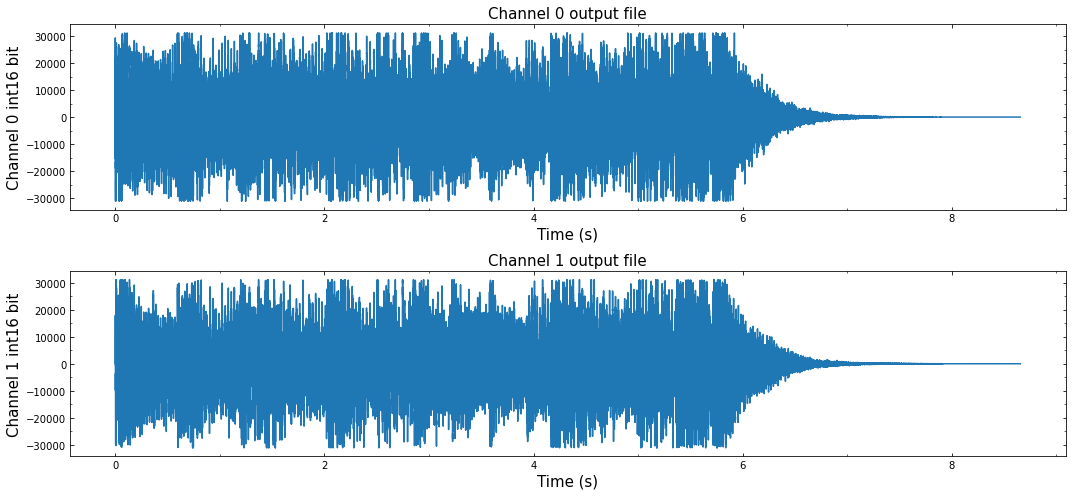

In [8]:
# pseudocode for producing plots for each channel
# read in data
# create time array using the length and sample
# set up plotting and figures

# read the data into two stereo channels
# sample is the sampling rate, data is the data in each channel dimensions [2, nsamples]
sample, data = read('GraviteaTime.wav')
# sample is the sampling frequency, 44100 Hz
# separate into channels
channel_0 = data[:, 0]
channel_1 = data[:, 1]
N_Points = len(channel_0)
# ... do work on the data...
time_length = N_Points/sample
time = np.linspace(0,time_length,N_Points)

figure, (ax0,ax1) = plt.subplots(figsize=(15,7),ncols=1,nrows=2)

ax0.plot(time,channel_0)
ax0.set_title('Channel 0 output file',fontsize=text)
ax0.set_xlabel('Time (s)',fontsize=text)
ax0.set_ylabel('Channel 0 int16 bit',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(5000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

ax1.plot(time,channel_1)
ax1.set_title('Channel 1 output file',fontsize=text)
ax1.set_xlabel('Time (s)',fontsize=text)
ax1.set_ylabel('Channel 1 int16 bit',fontsize=text)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(5000))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig('Channel_raw_output.pdf')
plt.show()

### Part c

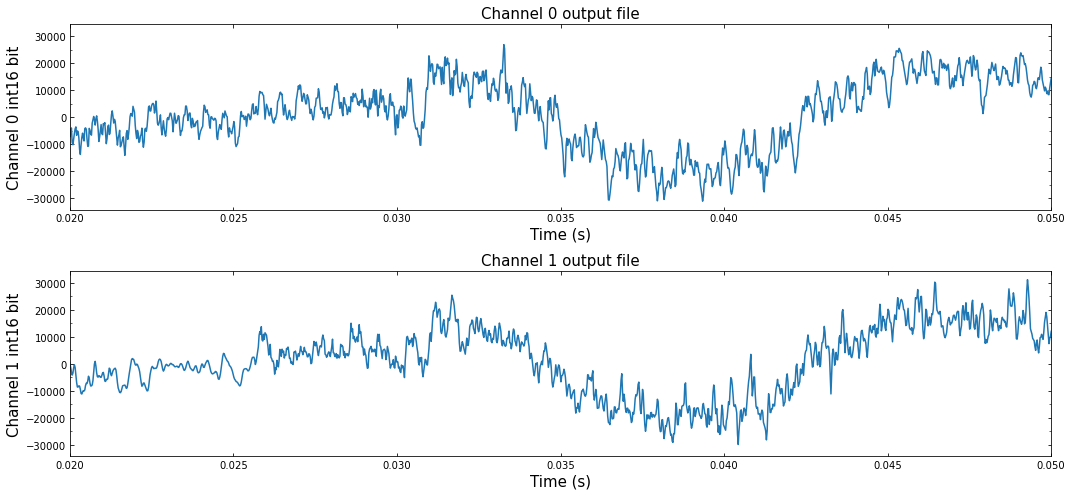

In [9]:
figure, (ax0,ax1) = plt.subplots(figsize=(15,7),ncols=1,nrows=2)

ax0.plot(time,channel_0)
ax0.set_title('Channel 0 output file',fontsize=text)
ax0.set_xlabel('Time (s)',fontsize=text)
ax0.set_ylabel('Channel 0 int16 bit',fontsize=text)
ax0.set_xlim(0.02,0.05)
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(MultipleLocator(5000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')

ax1.plot(time,channel_1)
ax1.set_title('Channel 1 output file',fontsize=text)
ax1.set_xlabel('Time (s)',fontsize=text)
ax1.set_ylabel('Channel 1 int16 bit',fontsize=text)
ax1.set_xlim(0.02,0.05)
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(5000))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig('Channel_raw_zoom.pdf')
plt.show()

### Part d

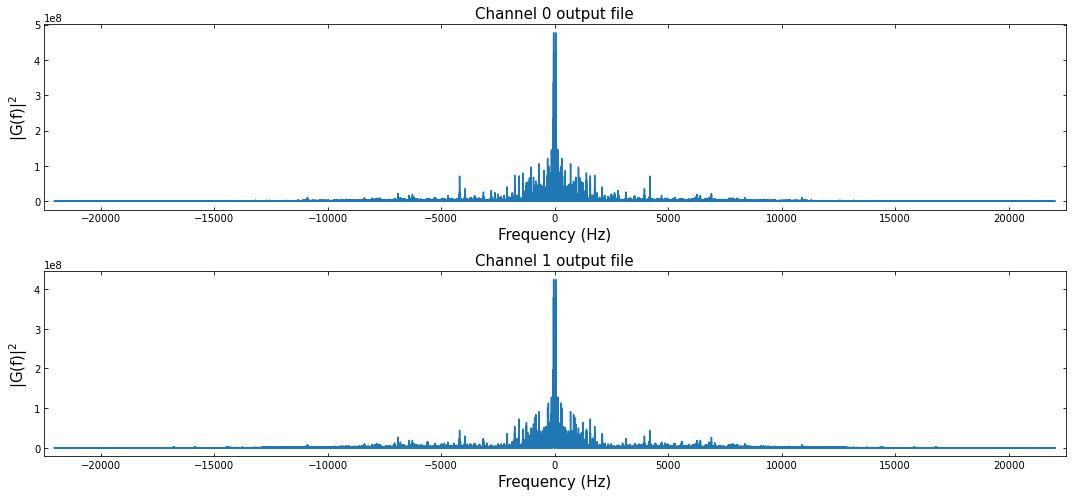

In [10]:
# pseudocode for part d
# find fourier of both channels using np.fft.fft
# find the frequency domain using np.fft.fftfreq
# plot the figures
# filter the frequencies above 880 Hz, np.where()
# plot filtered frequencies

fourier_0 = np.fft.fft(channel_0)
fourier_1 = np.fft.fft(channel_1)
fourier_0a = np.abs(fourier_0)
fourier_1a = np.abs(fourier_1)

freq = np.fft.fftfreq(N_Points,1/sample)

figure, (ax0,ax1) = plt.subplots(figsize=(15,7),ncols=1,nrows=2)

ax0.plot(freq,fourier_0a)
ax0.set_title('Channel 0 output file',fontsize=text)
ax0.set_xlabel('Frequency (Hz)',fontsize=text)
ax0.set_ylabel(r'|G(f)|$^2$',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(5000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.set_xlim(-22500,22500)

ax1.plot(freq,fourier_1a)
ax1.set_title('Channel 1 output file',fontsize=text)
ax1.set_xlabel('Frequency (Hz)',fontsize=text)
ax1.set_ylabel(r'|G(f)|$^2$',fontsize=text)
ax1.xaxis.set_minor_locator(MultipleLocator(5000))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.set_xlim(-22500,22500)

plt.tight_layout()
plt.savefig('channel_freq.pdf')
plt.show()

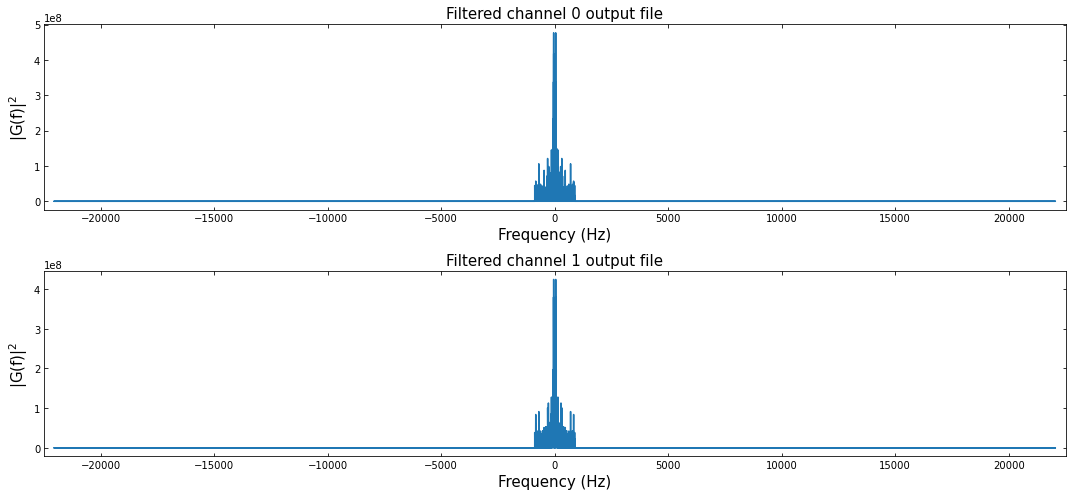

In [11]:
# filtering  frequencies greater than 880 Hz and less than -880 Hz
fourier_0a[np.where(abs(freq)>880)] = 0
fourier_1a[np.where(abs(freq)>880)] = 0

fourier_0[np.where(abs(freq)>880)] = 0
fourier_1[np.where(abs(freq)>880)] = 0

figure, (ax0,ax1) = plt.subplots(figsize=(15,7),ncols=1,nrows=2)

ax0.plot(freq,fourier_0a)
ax0.set_title('Filtered channel 0 output file',fontsize=text)
ax0.set_xlabel('Frequency (Hz)',fontsize=text)
ax0.set_ylabel(r'|G(f)|$^2$',fontsize=text)
ax0.xaxis.set_minor_locator(MultipleLocator(5000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.set_xlim(-22500,22500)

ax1.plot(freq,fourier_1a)
ax1.set_title('Filtered channel 1 output file',fontsize=text)
ax1.set_xlabel('Frequency (Hz)',fontsize=text)
ax1.set_ylabel(r'|G(f)|$^2$',fontsize=text)
ax1.xaxis.set_minor_locator(MultipleLocator(5000))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
ax1.set_xlim(-22500,22500)

plt.tight_layout()
plt.savefig('channel_fre_filtered.pdf')
plt.show()

### Part e

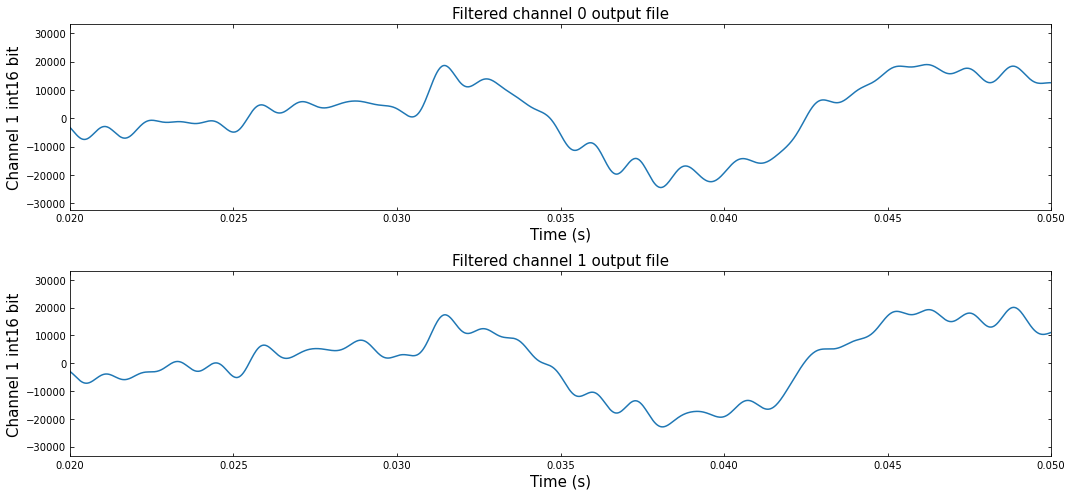

In [12]:
filtered_0 = np.fft.ifft(fourier_0)
filtered_1 = np.fft.ifft(fourier_1)

figure, (ax0,ax1) = plt.subplots(figsize=(15,7),ncols=1,nrows=2)

ax0.plot(time,filtered_0.real)
ax0.set_title('Filtered channel 0 output file',fontsize=text)
ax0.set_xlabel('Time (s)',fontsize=text)
ax0.set_ylabel('Channel 1 int16 bit',fontsize=text)
#ax0.xaxis.set_minor_locator(MultipleLocator(5000))
ax0.yaxis.set_ticks_position('both') 
ax0.xaxis.set_ticks_position('both')
ax0.set_xlim(0.02,0.05)

ax1.plot(time,filtered_1.real)
ax1.set_title('Filtered channel 1 output file',fontsize=text)
ax1.set_xlabel('Time (s)',fontsize=text)
ax1.set_ylabel('Channel 1 int16 bit',fontsize=text)
#ax1.xaxis.set_minor_locator(MultipleLocator(5000))
ax1.yaxis.set_ticks_position('both') 
ax1.xaxis.set_ticks_position('both')
#ax1.set_xlim(-22500,22500)
ax1.set_xlim(0.02,0.05)

plt.tight_layout()
plt.savefig('Channel_filtered_zoom.pdf')
plt.show()

data_out = empty(data.shape, dtype = data.dtype)
data_out[:, 0] = filtered_0.real
data_out[:, 1] = filtered_1.real
write('GraviteaTime lpf.wav.', sample, data_out)